In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,8
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv(r'D:\Cats Protection\updated_files\CatAdoptions.csv')
loc=pd.read_csv(r'D:\Cats Protection\new data\Location.csv')
cluster=pd.read_csv(r'D:\Cats Protection\location_cluster.csv')
df.shape

(191493, 15)

In [3]:
e=set(loc['locationID'])
f=df['locationId'].isin(e)
f

0         True
1         True
2         True
3         True
4         True
          ... 
191488    True
191489    True
191490    True
191491    True
191492    True
Name: locationId, Length: 191493, dtype: bool

In [4]:
loc_new=loc[['locationID','locationName']]
loc_new.rename({'locationID':'locationId'},axis = 1, inplace = True)
loc_new

,locationId,locationName
0,15114,Gosport Town
1,15145,Portsmouth
2,202528,Eskdale & District
3,202855,Walsall Borough
4,202858,Warrington
...,...,...
617,2114357,Teesside Stockton High Street Shop
618,2317196,Stroud Shop
619,2369428,Fort William
620,2433528,East Herts


In [5]:
new_df = df.merge(loc_new,on='locationId',how='left')
new_df.head()

,adoptionId,catId,locationId,adoptionDate,followUpDate,followUpComplete,adoptionFee,donation,giftAid,completed,catHealthy,medicalSummaryProvided,petPlanNo,petPlanExportId,handFreeHoming,locationName
0,345548,251100,203111,01-01-2015 00:00,NaN,False,50,0,False,True,N,Y,7527629,745,False,Belfast
1,345551,255408,1462326,01-01-2015 00:00,NaN,False,30,0,False,True,N,N,0,0,False,Carmarthenshire
2,345553,256651,203461,01-01-2015 00:00,NaN,False,75,0,False,True,N,Y,7527630,747,False,North London
3,345555,255866,203240,01-01-2015 00:00,NaN,False,50,0,False,True,N,N,0,0,False,Gwent
4,345558,249761,203240,01-01-2015 00:00,NaN,False,50,0,False,True,N,N,0,0,False,Gwent


In [6]:
# Parse string to datetime
new_df["adoptionDate"]=pd.to_datetime(new_df["adoptionDate"])
new_df["adoptionDate"]=pd.to_datetime(new_df["adoptionDate"].dt.strftime("%d-%m-%y"))
new_df=new_df.sort_values(by=['adoptionDate'])
new_df["adoptionDate"]

0        2015-01-01
11       2015-01-01
10       2015-01-01
9        2015-01-01
7        2015-01-01
            ...    
191488   2021-06-19
191489   2021-06-19
191491   2021-06-27
191490   2021-06-27
191492   2021-06-28
Name: adoptionDate, Length: 191493, dtype: datetime64[ns]

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191493 entries, 0 to 191492
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   adoptionId              191493 non-null  int64         
 1   catId                   191493 non-null  int64         
 2   locationId              191493 non-null  int64         
 3   adoptionDate            191493 non-null  datetime64[ns]
 4   followUpDate            0 non-null       float64       
 5   followUpComplete        191493 non-null  bool          
 6   adoptionFee             191493 non-null  int64         
 7   donation                191493 non-null  int64         
 8   giftAid                 191493 non-null  bool          
 9   completed               191493 non-null  bool          
 10  catHealthy              191493 non-null  object        
 11  medicalSummaryProvided  191493 non-null  object        
 12  petPlanNo               191493

In [8]:
# corr=new_df.corr()
# plt.figure(figsize=(15,15))
# sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.2)

In [9]:
for i in new_df.columns:
    print(i, ':' ,new_df[i].nunique())

adoptionId : 191493
catId : 182198
locationId : 255
adoptionDate : 2356
followUpDate : 0
followUpComplete : 1
adoptionFee : 57
donation : 138
giftAid : 2
completed : 2
catHealthy : 2
medicalSummaryProvided : 3
petPlanNo : 96127
petPlanExportId : 2307
handFreeHoming : 2
locationName : 249


In [10]:
cluster_3_loc=cluster[cluster['km_6']==2]
clust_3_loc=set(cluster_3_loc['location'])

In [11]:
cluster_3=new_df[new_df['locationName'].isin(clust_3_loc)]
cluster_3

,adoptionId,catId,locationId,adoptionDate,followUpDate,followUpComplete,adoptionFee,donation,giftAid,completed,catHealthy,medicalSummaryProvided,petPlanNo,petPlanExportId,handFreeHoming,locationName
99,345588,256276,203387,2015-01-02,NaN,False,50,0,False,True,N,Y,7527650,746,False,Birmingham
101,345590,256277,203387,2015-01-02,NaN,False,50,0,False,True,N,Y,7527652,746,False,Birmingham
103,345592,249191,203001,2015-01-02,NaN,False,40,0,False,True,N,Y,7527654,749,False,Glasgow
110,345602,255465,203387,2015-01-02,NaN,False,50,50,False,True,N,Y,7527663,746,False,Birmingham
106,345595,249192,203001,2015-01-02,NaN,False,40,0,False,True,N,Y,7527657,749,False,Glasgow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191482,542155,541205,202890,2021-06-16,NaN,False,95,0,False,False,N,Y,7825302,0,True,National Cat
191485,542190,541534,202890,2021-06-17,NaN,False,95,0,False,False,N,Y,7825313,0,True,National Cat
191484,542161,535907,202961,2021-06-17,NaN,False,80,0,False,False,N,Y,7825306,0,False,Bridgend
191488,542096,541206,202890,2021-06-19,NaN,False,95,0,False,False,N,Y,7825284,0,True,National Cat


In [12]:
count = cluster_3.groupby(['adoptionDate']).size().to_frame(name = 'adoption_count').reset_index()

In [13]:
count

,adoptionDate,adoption_count
0,2015-01-02,37
1,2015-01-03,45
2,2015-01-04,36
3,2015-01-05,24
4,2015-01-06,11
...,...,...
2323,2021-06-14,20
2324,2021-06-15,4
2325,2021-06-16,2
2326,2021-06-17,2


## Weekly dataset

In [14]:
weekly_dataset=count.resample('W-Sun', label='right', closed = 'right', on='adoptionDate').sum()
weekly_dataset = weekly_dataset[['adoption_count']]
weekly_dataset

,adoption_count
adoptionDate,
2015-01-04,118
2015-01-11,162
2015-01-18,127
2015-01-25,132
2015-02-01,125
...,...
2021-05-23,121
2021-05-30,118
2021-06-06,133


In [15]:
weekly_dataset.drop(weekly_dataset.index[-1:],0,inplace=True)
weekly_dataset.tail()

,adoption_count
adoptionDate,
2021-05-16,108
2021-05-23,121
2021-05-30,118
2021-06-06,133
2021-06-13,161


In [16]:
weekly_dataset=weekly_dataset[-76:]
week_data=weekly_dataset.copy()

In [17]:
test = weekly_dataset[62:]
test

,adoption_count
adoptionDate,
2021-03-14,112
2021-03-21,118
2021-03-28,110
2021-04-04,114
2021-04-11,113
2021-04-18,115
2021-04-25,110
2021-05-02,113
2021-05-09,124


In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
weekly_dataset = sc.fit_transform(weekly_dataset)
weekly_dataset

array([[1.        ],
       [0.96216216],
       [0.75135135],
       [0.82702703],
       [0.61081081],
       [0.85945946],
       [0.74054054],
       [0.83783784],
       [0.83243243],
       [0.86486486],
       [0.74054054],
       [0.67567568],
       [0.02702703],
       [0.01081081],
       [0.        ],
       [0.01621622],
       [0.28108108],
       [0.17837838],
       [0.24864865],
       [0.48648649],
       [0.35135135],
       [0.51891892],
       [0.54054054],
       [0.58378378],
       [0.51351351],
       [0.79459459],
       [0.63783784],
       [0.59459459],
       [0.66486486],
       [0.75675676],
       [0.63783784],
       [0.78918919],
       [0.80540541],
       [0.69189189],
       [0.64864865],
       [0.76756757],
       [0.73513514],
       [0.85405405],
       [0.78378378],
       [0.75675676],
       [0.82162162],
       [0.78918919],
       [0.75135135],
       [0.89189189],
       [0.71351351],
       [0.69189189],
       [0.80540541],
       [0.724

In [19]:
len(weekly_dataset)

76

In [20]:
x_train = weekly_dataset[0:62]
test_data =weekly_dataset[62:]
y_train = weekly_dataset[1:63]

In [21]:
x_train= np.reshape(x_train,(62,1,1))
x_train

array([[[1.        ]],

       [[0.96216216]],

       [[0.75135135]],

       [[0.82702703]],

       [[0.61081081]],

       [[0.85945946]],

       [[0.74054054]],

       [[0.83783784]],

       [[0.83243243]],

       [[0.86486486]],

       [[0.74054054]],

       [[0.67567568]],

       [[0.02702703]],

       [[0.01081081]],

       [[0.        ]],

       [[0.01621622]],

       [[0.28108108]],

       [[0.17837838]],

       [[0.24864865]],

       [[0.48648649]],

       [[0.35135135]],

       [[0.51891892]],

       [[0.54054054]],

       [[0.58378378]],

       [[0.51351351]],

       [[0.79459459]],

       [[0.63783784]],

       [[0.59459459]],

       [[0.66486486]],

       [[0.75675676]],

       [[0.63783784]],

       [[0.78918919]],

       [[0.80540541]],

       [[0.69189189]],

       [[0.64864865]],

       [[0.76756757]],

       [[0.73513514]],

       [[0.85405405]],

       [[0.78378378]],

       [[0.75675676]],

       [[0.82162162]],

       [[0.78918

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [23]:
reg = Sequential()

In [24]:
reg.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [25]:
reg.add(Dense(units=1))

In [26]:
reg.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
reg.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 4ms/step - loss: 0.9934
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9585
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9237
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8905
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8577
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8268
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7961
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7668
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7386
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7111
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6846
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6586
Epoch 13/100
7/7 [==============================] - 0s 2ms/st

In [28]:
len(test_data)

14

In [29]:
inputs= np.reshape(test_data,(14,1,1))
inputs

array([[[0.60540541]],

       [[0.63783784]],

       [[0.59459459]],

       [[0.61621622]],

       [[0.61081081]],

       [[0.62162162]],

       [[0.59459459]],

       [[0.61081081]],

       [[0.67027027]],

       [[0.58378378]],

       [[0.65405405]],

       [[0.63783784]],

       [[0.71891892]],

       [[0.87027027]]])

In [30]:
pred_values= reg.predict(inputs)
pred_values

array([[0.5841574 ],
       [0.5879675 ],
       [0.58288425],
       [0.585429  ],
       [0.5847933 ],
       [0.5860642 ],
       [0.58288425],
       [0.5847933 ],
       [0.5917631 ],
       [0.58160955],
       [0.5898671 ],
       [0.5879675 ],
       [0.5974276 ],
       [0.6148081 ]], dtype=float32)

In [31]:
y_pred= sc.inverse_transform(pred_values)
y_pred

array([[108.06912 ],
       [108.77399 ],
       [107.83359 ],
       [108.30437 ],
       [108.18677 ],
       [108.42188 ],
       [107.83359 ],
       [108.18677 ],
       [109.47617 ],
       [107.59776 ],
       [109.12542 ],
       [108.77399 ],
       [110.52411 ],
       [113.739494]], dtype=float32)

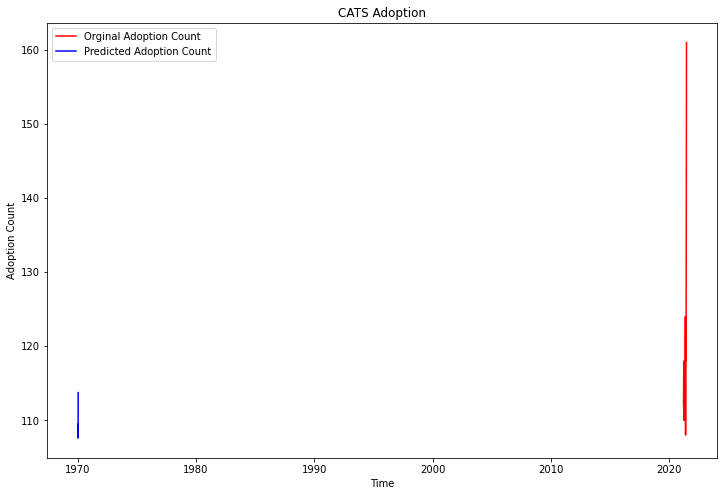

In [32]:
plt.plot(test, color='red',label='Orginal Adoption Count')
plt.plot(y_pred,color='blue',label='Predicted Adoption Count')
plt.title('CATS Adoption')
plt.xlabel('Time')
plt.ylabel('Adoption Count')
plt.legend()
plt.show()

In [33]:
n1 = float(input('Enter This weeks count:'))
n1 = np.array(n1).reshape(-1,1)
n2 = sc.transform(n1)
V = n2.reshape(-1,1,1)
Val =reg.predict(V)
final = sc.inverse_transform(Val)
print('Predicted Adoption Count: ',final)


Enter This weeks count:160
Predicted Adoption Count:  [[113.62591]]


In [34]:
from pandas.tseries.offsets import DateOffset
future_dates = [week_data.index[-1]+DateOffset(weeks=x) for x in range(0,12)]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=week_data.columns)

In [35]:
future_dates_df

,adoption_count
2021-06-20,NaN
2021-06-27,NaN
2021-07-04,NaN
2021-07-11,NaN
2021-07-18,NaN
2021-07-25,NaN
2021-08-01,NaN
2021-08-08,NaN
2021-08-15,NaN
2021-08-22,NaN


In [36]:
week_data

,adoption_count
adoptionDate,
2020-01-05,185
2020-01-12,178
2020-01-19,139
2020-01-26,153
2020-02-02,113
...,...
2021-05-16,108
2021-05-23,121
2021-05-30,118


In [37]:
n1 = week_data[-1:]
n1 = np.array(n1).reshape(-1,1)
n2 = sc.transform(n1)
V = n2.reshape(-1,1,1)
Val =reg.predict(V)
final = sc.inverse_transform(Val)
print('Predicted Adoption Count: ',final)

Predicted Adoption Count:  [[113.739494]]


In [59]:
data=week_data.copy()

In [57]:
data

,adoption_count
adoptionDate,
2020-01-05,185
2020-01-12,178
2020-01-19,139
2020-01-26,153
2020-02-02,113
...,...
2021-05-16,108
2021-05-23,121
2021-05-30,118


In [58]:
# dataset_total = pd.concat((data['adoption_count'], future_dates_df['adoption_count']), axis = 0)
# inputs = data[-12:].values
# inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)
# X_test = []
# for i in range(76,90):
#     X_test.append(inputs[i-76:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# predicted_adoption = reg.predict(X_test)
# predicted_adoption = sc.inverse_transform(predicted_adoption)

IndexError: tuple index out of range

In [60]:
data=week_data.copy()
data = data['adoption_count'].values
data = data.reshape((1,-1))
data = data.reshape((-1))
look_back=12
def predict(num_prediction, model):
    prediction_list = data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
#         x1 = np.array(x).reshape(-1,1)
#         x1 = sc.transform(x)
        x1 = x.reshape((1, look_back, 1))
        out = model.predict(x1)
        out =sc.inverse_transform(out)
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = data[-1]
    prediction_dates = pd.date_range('2021-06-20', periods=num_prediction+1, freq='W').tolist()
    return prediction_dates

num_prediction = 12
forecast = predict(num_prediction, reg)
forecast_dates = predict_dates(num_prediction)
f_data = pd.DataFrame(forecast, columns = ["forcast_lstm"], index =forecast_dates )
f_data

,forcast_lstm
2021-06-20,161.000000
2021-06-27,221.493103
2021-07-04,221.493103
2021-07-11,221.493103
2021-07-18,221.493103
2021-07-25,221.493103
2021-08-01,221.493103
2021-08-08,221.493103
2021-08-15,221.493103
2021-08-22,221.493103


In [ ]:
forecast

In [ ]:
forecast_dates

In [ ]:
week_data.reset_index()['adoptionDate'][75]

In [ ]:
n1 = week_data[-1:]
n1 = np.array(n1).reshape(-1,1)
for i in range(12):
    n2 = sc.transform(n1)
    V = n2.reshape(-1,1,1)
    Val =reg.predict(V)
    final = sc.inverse_transform(Val)
    print('Predicted Adoption Count: ',final)
#     for i in future_dates_df.values:
#     future_dates_df[i]=final
#     n1=final
# future_dates_df

In [ ]:
future_dataframe_weekly = pd.concat([week_data,future_dates_df])

In [ ]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [ ]:
y_test=sc.inverse_transform(test_data)
y_test

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
rmspe = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
rmspe